In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('carprice.csv')
data.head()

,symboling,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,2,4,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,2,4,5,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,2,4,5,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
predictors = data.keys()
predictors = predictors.drop('price')
predictors

Index(['symboling', 'fueltype', 'doornumber', 'carbody', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [4]:
target = 'price'

In [5]:
X = data[predictors]
Y = data[target]

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [8]:
print(np.shape(X_train), np.shape(X_test))

(143, 18) (62, 18)


In [9]:
GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01)
GB.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
r2_score(Y_test, GB.predict(X_test))

0.7817184728013012

/home/toshiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/home/toshiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/toshiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previou

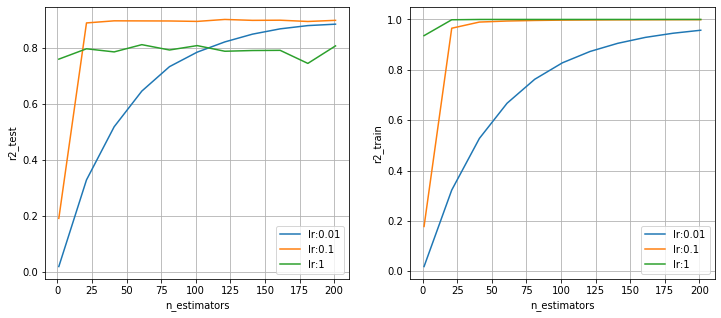

In [11]:
learning_rates = [0.01,0.1,1]
n_estimators = np.arange(1,220,20)

fig = plt.figure(figsize=(12,5))

for lr in learning_rates:
    r2_test = []
    r2_train = []

    for ne in n_estimators:
        GB = GradientBoostingRegressor(n_estimators=ne, learning_rate=lr)
        GB.fit(X_train, Y_train)
        r2_test.append( r2_score(Y_test, GB.predict(X_test)) )
        r2_train.append( r2_score(Y_train, GB.predict(X_train)) )
    
    plt.subplot(1,2,1)
    plt.plot(n_estimators,r2_test, label=f'lr:{lr}')
        
    plt.subplot(1,2,2)
    plt.plot(n_estimators,r2_train, label=f'lr:{lr}')
    

plt.subplot(1,2,1)
plt.grid()
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('r2_test')

plt.subplot(1,2,2)
plt.grid()
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('r2_train')            

plt.show()

Text(0.5, 0, 'Feature Importances')

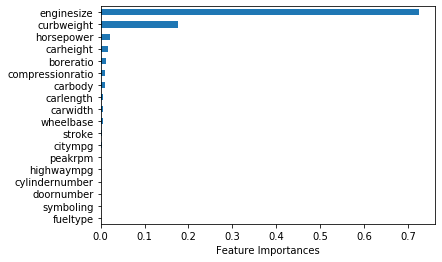

In [12]:
# Grafica las importancias en orden descendente
ii = np.argsort(GB.feature_importances_)

importances = GB.feature_importances_[ii]
predictors = predictors[ii]

a = pd.Series(importances, index=predictors)
a.plot(kind='barh')
plt.xlabel('Feature Importances')

In [13]:
feature = ['enginesize']

GB = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01)
GB.fit(np.array(X_train[feature]).reshape(-1, 1), Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
r2_score(Y_test, GB.predict(np.array(X_test[feature]).reshape(-1, 1)))

0.8199813832368256

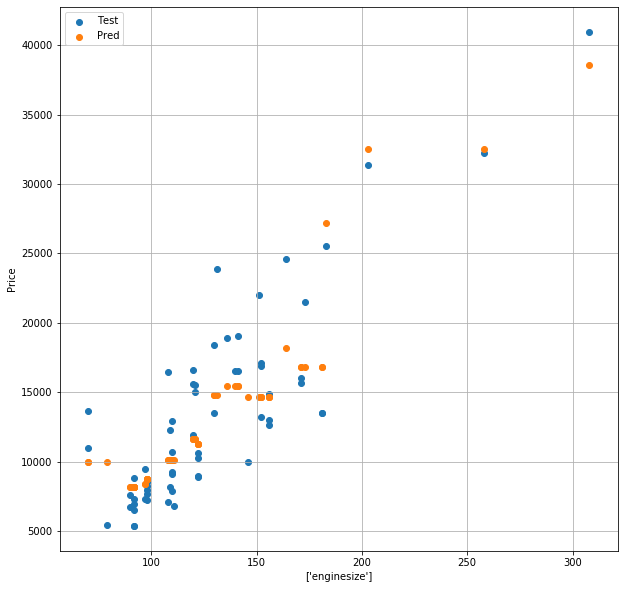

In [15]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.array(X_test[feature]).reshape(-1,1), Y_test, label='Test')
plt.scatter(np.array(X_test[feature]).reshape(-1,1), GB.predict(np.array(X_test[feature]).reshape(-1,1)), label='Pred')
plt.legend()
plt.xlabel(feature)
plt.ylabel('Price')
plt.grid()